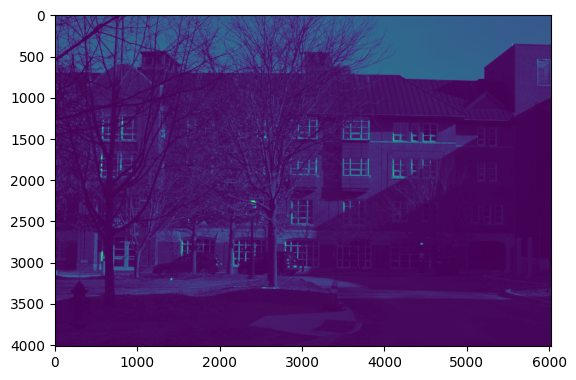

In [1]:
#Assignment 1 
#cs73, 23s
#Jemely Robles

import numpy as np
from skimage import util
from skimage import color
from skimage import io
from skimage import data
import matplotlib.pyplot as plt
from scipy import interpolate


img1 = io.imread('./data/Thayer.tiff')
image1 = img1.astype(np.float64)
height1, width1 = image1.shape


#Linearizationz
blackthresh = 2044.
whitethresh = 16383.

lin1 = whitethresh - blackthresh

image1 -= blackthresh
image1 = image1/lin1
image1 = np.clip(image1, 0.0, 1.0)

plt.imshow(image1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


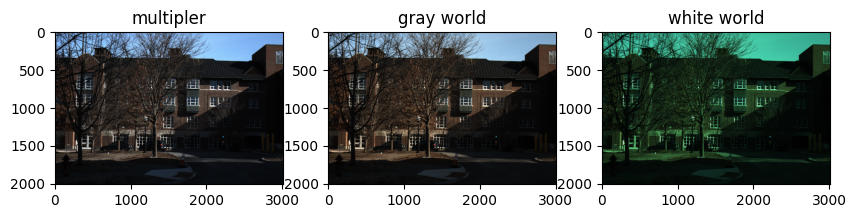

In [2]:

#Whitebalance
#demosaicing while balancing
red = image1[0::2, 0::2]
green = image1[0::2, 1::2] 
blue = image1[1::2, 1::2]

rmean = red.mean()
gmean = green.mean()
bmean = blue.mean()

rmax = red.max()
gmax = green.max()
bmax = blue.max()

whiter = red * gmax/rmax
whiteb = blue * gmax/bmax

greyr = red * (gmean/rmean)
greyb = blue * (gmean/bmean)

grayworld = np.dstack((greyr, green, greyb))

whiteworld = np.dstack((whiter, green, whiteb))

multipliers = np.dstack((red* 2.165039, green* 1.000000, blue* 1.643555))

fig, axs = plt.subplots(1, 3, figsize=(10, 5))
axs[0].imshow(multipliers*2)
axs[0].set_title("multipler")
axs[1].imshow(grayworld*2)
axs[1].set_title("gray world")
axs[2].imshow(whiteworld*2)
axs[2].set_title("white world")
plt.show()

In [3]:
#Demosaic

#DISCLAIMER:
#ACTUAL DEMOSAICING HAPPENS IN THE WHITE BALANCE PORTION, THIS COMMENTED OUT CODE IS WHAT HOW I WOULD HAVE USED INTERPOLATE

#grid =  grayworld.copy()

#red = grid[:,:,0]
#green = grid[:,:,1]
#blue = grid[:,:,2]

#width = grid.shape[1]
#height = grid.shape[0]  

#Rx = np.arange(0, red.shape[1], 1)
#Ry = np.arange(0, red.shape[0], 1)

#xx, yy = np.meshgrid(Rx, Ry) 

#print(Rx.shape, Ry.shape, red.shape, xx.shape)

#newred = interpolate.interp2d(xx, yy, red)
#newgreen = interpolate.interp2d(xx, yy, green)
#newblue = interpolate.interp2d(xx, yy, blue)

#xnew = np.arange(0, width-1, 1)
#ynew = np.arange(0, height-1, 1)
#zrnew = newred(xnew, ynew)
#zgnew = newgreen(xnew,ynew)
#zbnew = newblue(xnew, ynew)
                       
#demosaicimg = np.dstack(zrnew, zgnew, zbnew)

#plt.show(demosaicimg)

#plt.show()

(2008, 3010, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(3, 2008, 3010)


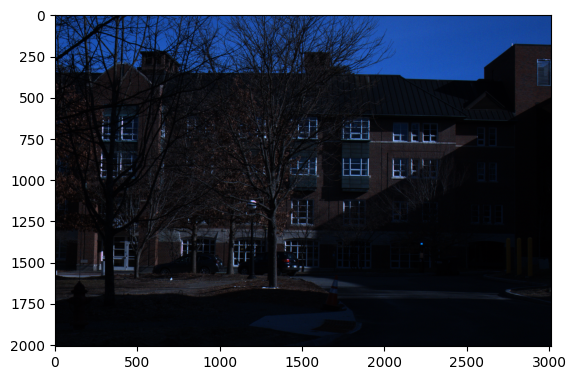

In [4]:
#Color Correction

CCimg = grayworld.copy()


x = CCimg[:, : ,0]
y = CCimg[:, :, 1]
z = CCimg[:, :, 2]
print(CCimg.shape)

width = CCimg.shape[1]
height = CCimg.shape[0]

MsRGB_to_xyz = np.array([[0.4124564, 0.3575761, 0.1804375],
                         [0.2126729, 0.7151522, 0.0721750],
                         [0.0193339, 0.1191920, 0.9503041]])

MsXYZ_to_cam = np.array([[2.4542,-1.0860,-0.3401],
                         [-0.1490,1.1370,-0.0297],
                         [0.2858,-0.0605,0.3225]])


MsRGB_to_cam = MsXYZ_to_cam @ MsRGB_to_xyz

row_sums = MsRGB_to_cam.sum(axis=1)

normsrgb2cam = MsRGB_to_cam / row_sums[:, np.newaxis]

rgb2caminv = np.linalg.inv(normsrgb2cam)

rgb = np.stack((x.flatten(), y.flatten(), z.flatten()))

srgb = rgb.T @ rgb2caminv  # (3, 3) x (3, 2008, 3010)

nx = srgb[:,0]
ny = srgb[:,1]
nz = srgb[:,2]

final = np.stack((nx, ny, nz))
final = final.reshape(3, height, width)
CCimg = np.transpose(final, [1, 2, 0])
print(final.shape)

plt.imshow(CCimg)


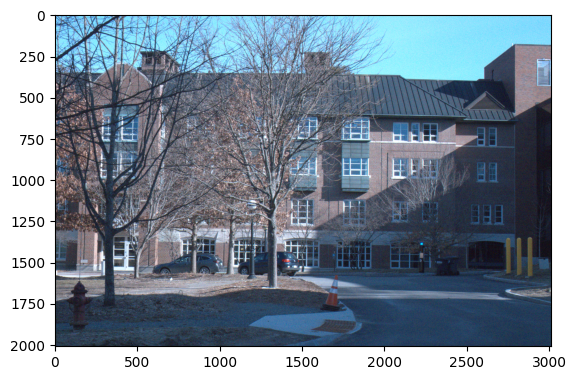

In [5]:
#Brightness adjustment and gamma encoding

image = CCimg.copy()

gray = color.rgb2gray(image)
mean = np.mean(gray)

percent = 0.22
brighterimg = image * (percent / mean)

clippedimg = np.clip(brighterimg, 0, 1)
#plt.imshow(clippedimg)


#gamma encoding-idk

Clinear = np.clip(clippedimg, 0, 1)
Cnon_linear = np.where(Clinear <= 0.0031308, 12.92*Clinear, (1+0.055)*np.power(Clinear, 1.0/2.4) - 0.055)


plt.imshow(Cnon_linear)


In [6]:
finalimg = Cnon_linear.copy()

io.imsave('./data/bonus1c.png', finalimg*255)

io.imsave('./data/whiteworld.png', whiteworld*255)

io.imsave('./data/grayworld.png', grayworld*255)

io.imsave('./data/multipliersbalance.png', multipliers*255)

io.imsave('./data/whiteworld.png', whiteworld*255)

io.imsave('./data/colorcorrection.png', CCimg*255)

io.imsave('./data/finalimg.jpg', finalimg*255, quality=95)

Lossy conversion from float64 to uint8. Range [0.0, 254.99999999999997]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 235.8114233907525]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 552.9367090320939]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 510.57943061894133]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 235.8114233907525]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-135.78005391774906, 594.9566454373509]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 254.99999999999997]. Convert image to uint8 prior to saving to suppress this warning.


/var/folders/km/z2_f7kxx4d99k8s1c54g9n5w0000gn/T/ipykernel_9426/1460459538.py:24: RuntimeWarning: invalid value encountered in true_divide
  balancer = red * (green/red)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


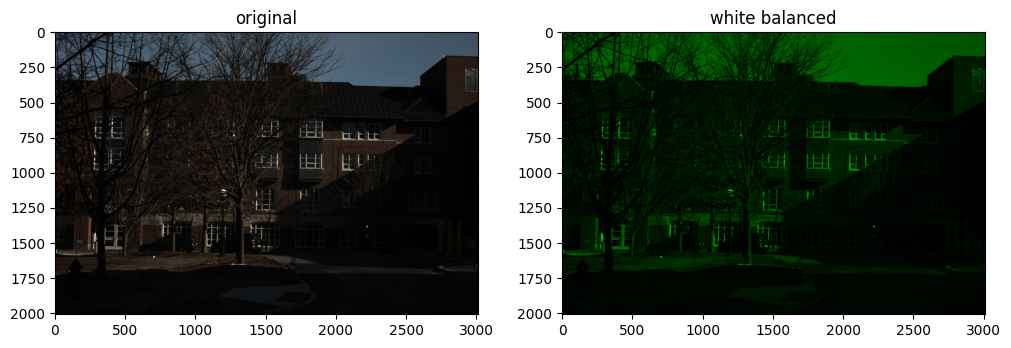

In [7]:
#Manual White Balance

#DISCLAIMER: 
#I WAS UNABLE TO USE ginput SO I JUST CHOSE A COORDINATE FOR THE CODE


%matplotlib inline
img = grayworld.copy()

#plt.imshow(img)
#plt.title("pick a white patch")
#coords = plt.ginput(1)
#plt.close()
h,w,c = img.shape

# choosing coords (284, 1448)
coords = img[284-int(h/2):: 284+int(h/2), 1448-int(w/2):: 1448+int(w/2),:]

red = coords[:, : ,0]
green = coords[:, :, 1]
blue = coords[:, :, 2]


balancer = red * (green/red)
balanceb = blue * (green/blue)

wbimg = img.copy()
wbimg[:, :, 0] = balancer
wbimg[:, :, 2] = balanceb

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(img)
axs[0].set_title("original")
axs[1].imshow(wbimg)
axs[1].set_title("white balanced")
plt.show()

In [9]:
io.imsave('./data/ManualWB284.1448.png', wbimg*255)

Lossy conversion from float64 to uint8. Range [0.0, 235.8114233907525]. Convert image to uint8 prior to saving to suppress this warning.
